<a href="https://colab.research.google.com/github/desouzaflavio/MyPythonProjects/blob/master/Regress%C3%A3o_Linear_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
# Dataset de treino
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
 
# Dataset de teste
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

#Criando dataset Pandas
df_train = pd.DataFrame({'x':train_X, 'y': train_Y})
df_test = pd.DataFrame({'x': test_X, 'y': test_Y})

In [9]:
learn_rate = 0.01
training_epochs = 2000
display_step = 200

In [20]:
df_train.x.shape

(17,)

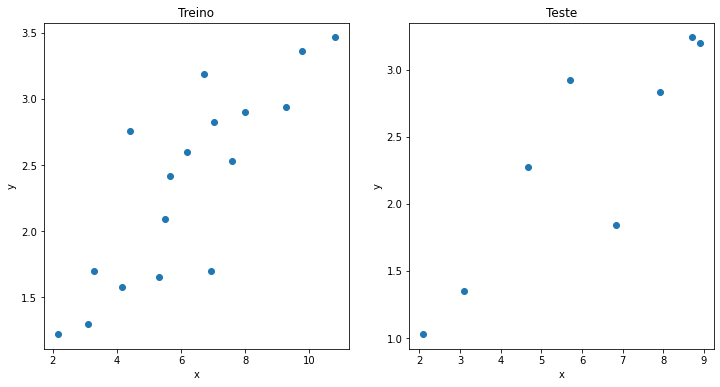

In [32]:
fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(df_train.x, df_train.y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Treino')

plt.subplot(1,2,2)
plt.scatter(df_test.x, df_test.y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Teste')

plt.show()

In [24]:
def build_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=1, activation='relu', input_shape=[1]))
  model.compile(optimizer=tf.keras.optimizers.Adam(learn_rate), loss='mse')
  return model

In [26]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(df_train.x, df_train.y, epochs=training_epochs, verbose=False)

[]

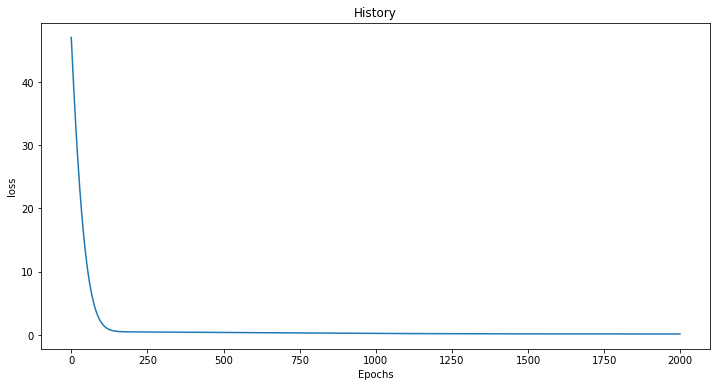

In [35]:
#Histório de treinamento
plt.figure(figsize=(12,6))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('History')
plt.plot(history.history['loss'])
plt.plot()

[]

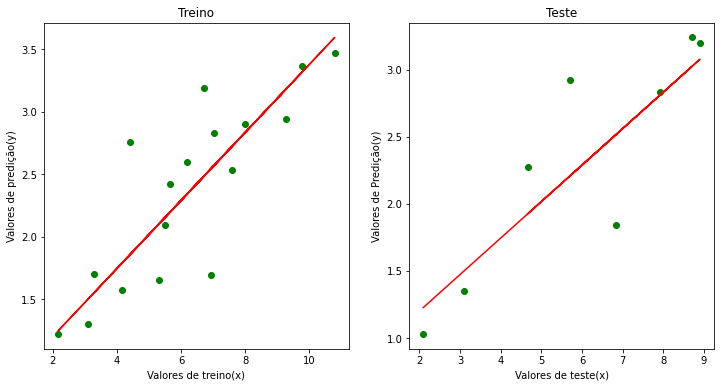

In [44]:
#Gráfico da função de regressão linear

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.xlabel('Valores de treino(x)')
plt.ylabel('Valores de predição(y)')
plt.title('Treino')
plt.scatter(df_train.x, df_train.y, color='g', label='Dados Originais')
plt.plot(df_train.x, model.predict(df_train.x), color='r', label='Linha de Regressão')

plt.subplot(1,2,2)
plt.xlabel('Valores de teste(x)')
plt.ylabel('Valores de Predição(y)')
plt.title('Teste')
plt.scatter(df_test.x, df_test.y, color='g', label='Dados de Teste')
plt.plot(df_test.x, model.predict(df_test.x), color='r', label='Linha de Regressão')

plt.plot()